In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
new_dir = 'D:/Citadel_WiDS/week0/NIFTY_50'
os.chdir(new_dir)
df = pd.read_csv("NIFTY 50_minute.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume
date,,,,,
2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [3]:
df = df.dropna()


In [4]:
df['returns'] = df['close'].pct_change()
df = df.dropna()

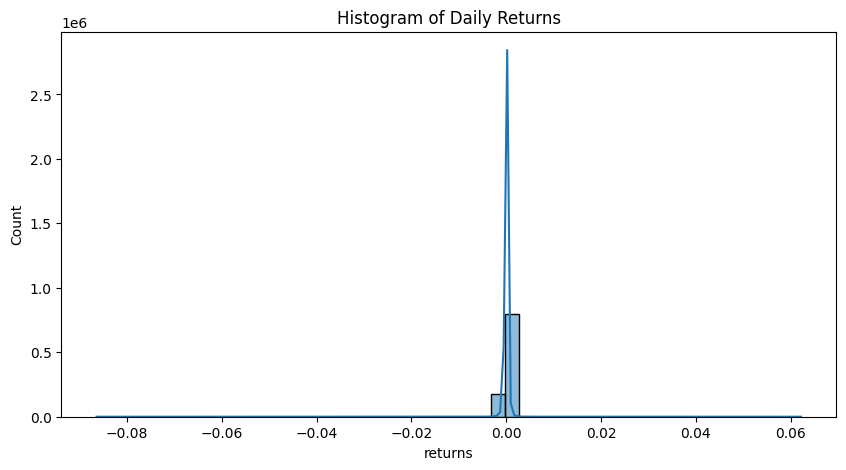

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['returns'], bins=50, kde=True)
plt.title("Histogram of Daily Returns")
plt.show()

In [6]:
df['rolling_vol'] = df['returns'].rolling(window=21).std()

In [7]:
text = (
    "The rolling standard deviation plot shows clear volatility clustering.\n"
    "Periods of high volatility appear together in spikes and stay elevated\n"
    "for days or weeks, especially during market stress.\n"
    "Similarly, calm periods create long stretches of low volatility.\n"
    "This matches typical financial time-series behavior."
)

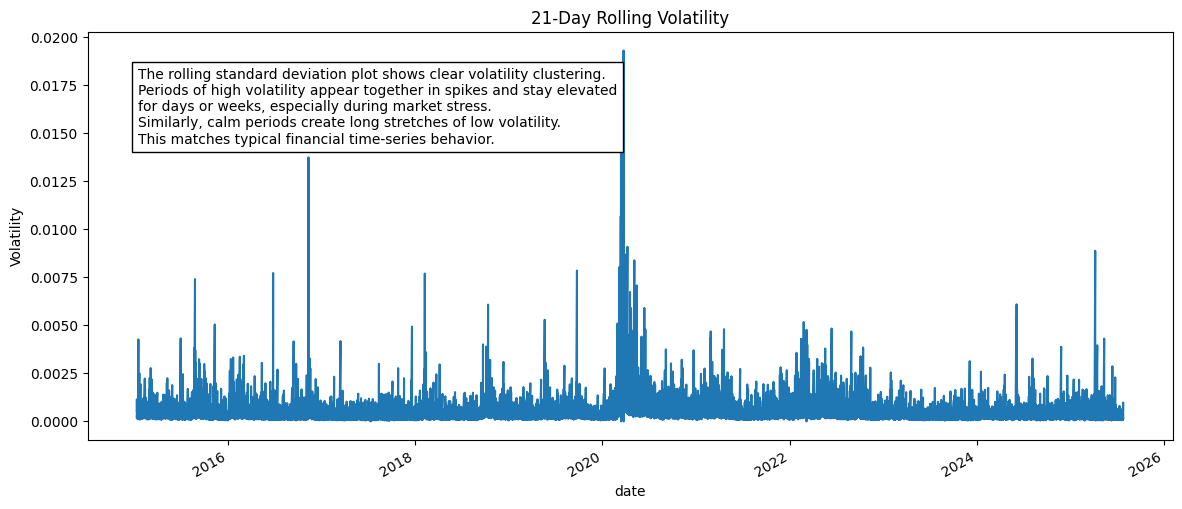

In [8]:
plt.figure(figsize=(14,6))
plt.text(
    df.index[int(len(df)*0.001)],               
    df['rolling_vol'].max()*0.75,              
    text,
    fontsize=10,
    bbox=dict(facecolor='white')     
)
df['rolling_vol'].plot()
plt.title("21-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()